<a href="https://colab.research.google.com/github/01aleem/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
import warnings
warnings.filterwarnings("ignore")
% matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/EDA/Hotel Bookings.csv')

In [63]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [64]:
df.shape

(119390, 32)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [67]:
df.duplicated().sum()

31994

In [68]:
# we can see above that there are a large amount of duplicated values
# although as there are no unique values in the row, such as a booking ID, which means that these could be genuine entries
# However, being similar on every parameter is highly unlikely
# Hence we will drop the duplicates

df= df.drop_duplicates()

In [69]:
df.shape

(87396, 32)

In [70]:
df.arrival_date_year.unique()

array([2015, 2016, 2017])

In [72]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [74]:
from datetime import datetime

In [75]:
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: datetime.strptime(x, '%B'))

In [76]:
df['arrival_date_month'].unique()

array(['1900-07-01T00:00:00.000000000', '1900-08-01T00:00:00.000000000',
       '1900-09-01T00:00:00.000000000', '1900-10-01T00:00:00.000000000',
       '1900-11-01T00:00:00.000000000', '1900-12-01T00:00:00.000000000',
       '1900-01-01T00:00:00.000000000', '1900-02-01T00:00:00.000000000',
       '1900-03-01T00:00:00.000000000', '1900-04-01T00:00:00.000000000',
       '1900-05-01T00:00:00.000000000', '1900-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [77]:
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: x.month)

In [78]:
df['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [79]:
df['date'] = df["arrival_date_day_of_month"].astype(str) + '-' + df["arrival_date_month"].astype(str) + '-' + df["arrival_date_year"].astype(str)

In [80]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [81]:
df.rename(columns = {'is_canceled':'canceled', 'arrival_date_year':'year', 'arrival_date_month':'month', 'arrival_date_week_number':'week_of_month',
                     'is_repeated_guest': 'repeated_guest'}, inplace = True)

In [82]:
df.drop(columns = ['week_of_month'], inplace = True)

In [83]:
df['children'] = df['children'].fillna(0)

In [84]:
df['children'] = df['children'].astype('int')

In [85]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [86]:
# the reservation status column already accounts for cancelations, hence we can drop the column 'canceled'.
# Also the column 'canceled' includes no-shows as well, but treat them as under the umbrella of canceled, which is differentiated in reservation status column 

df.drop(columns = ['canceled'], inplace = True)

In [87]:
# the date column has been created, there is no need for a column for days of the month

df.drop(columns = ['arrival_date_day_of_month'], inplace = True)

In [88]:
df['reservation_status_date'] = df['reservation_status_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [89]:
# we drop the agents column as it does not provide any valueable insights

df.drop(columns = ['agent'], inplace = True)

In [90]:
df['company'].isnull().sum()*100 / df.shape[0]

93.98256213098998

In [91]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [92]:
df.drop(columns = ['company'], inplace = True)

In [93]:
df.rename(columns = {'total_of_special_requests':'special_requests', 'required_car_parking_spaces':'car_parks_required'}, inplace = True)

In [94]:
df.drop(columns = ['adr'], inplace = True)

In [95]:
df.rename(columns = {'previous_bookings_not_canceled':'previous_stays'}, inplace = True)

In [96]:
# nan values for country is less than 5%, it can be dropped

df = df.dropna(axis = 0)

In [123]:
df.year.unique()

array([2015, 2016, 2017])

In [124]:
df['kids'] = df.children + df.babies

In [125]:
no_kids_df = df[df['kids'] == 0]

In [127]:
with_kids_df = df[df['kids'] != 0]

**Univariate Analysis**

In [135]:
df.columns

Index(['hotel', 'lead_time', 'year', 'month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel', 'repeated_guest',
       'previous_cancellations', 'previous_stays', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'car_parks_required',
       'special_requests', 'reservation_status', 'reservation_status_date',
       'date', 'kids'],
      dtype='object')

Let us take some columns for univariate analysis and see if we can derive any insights out of them at this stage

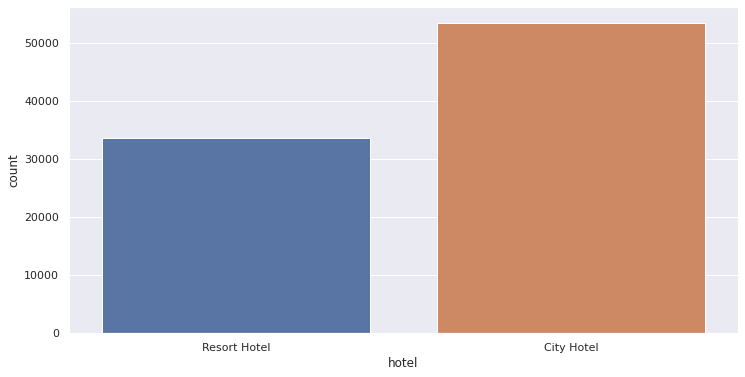

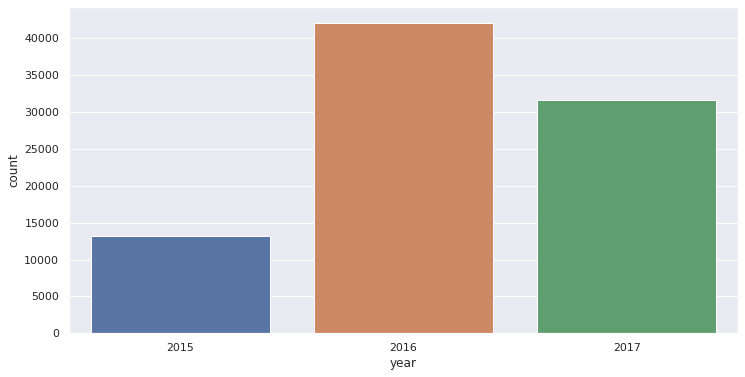

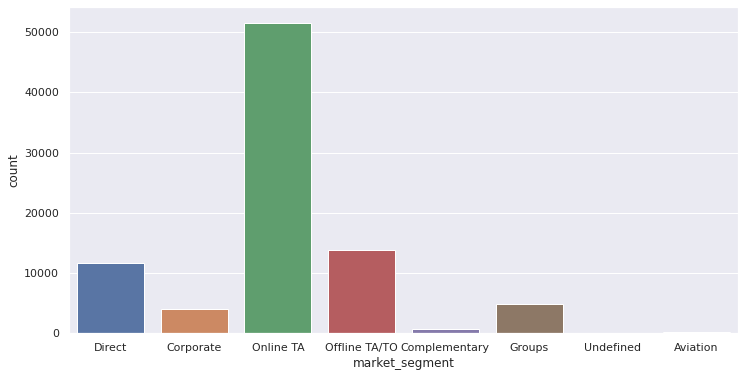

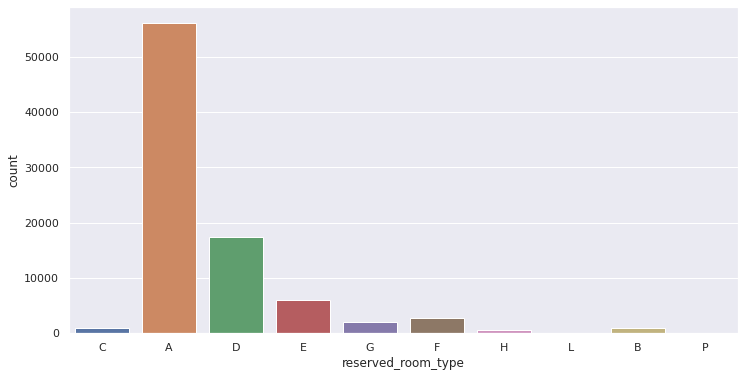

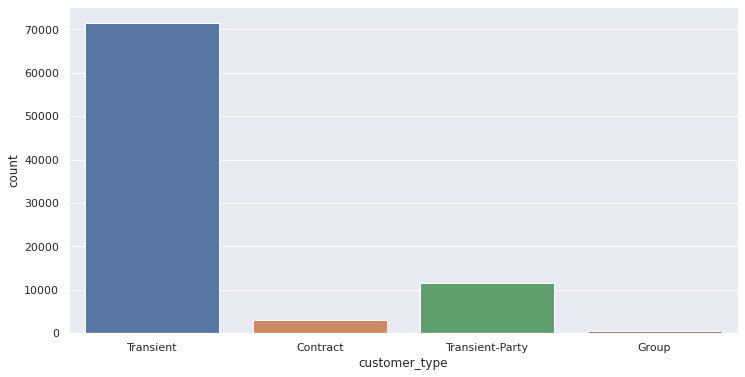

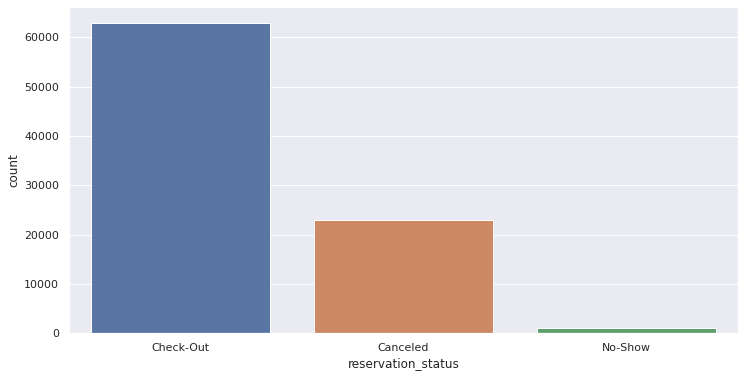

In [136]:
cols_for_uni = ['hotel', 'year', 'market_segment', 'reserved_room_type', 'customer_type', 'reservation_status']

for col in cols_for_uni:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  sns.countplot(df[col], x= col, ax= ax)
  plt.show()

**Some insights from the above**

**Cancelations**: It can be seen that there are significant amount of cancelations across both hotels. Cancelations might be seen as aberrations, but it is clear from our data that the hotels may need to be ready for such occurances. The hotels can take insights from the data to understand what kind of customer is likely to cancel their bookings, and in turn make better marketing strategies.

**Segment**: The largest segment is the Online TA. The hotels can do more to attract other segments as well

**Number of bookings**: The city hotel was booked more than the resort hotel

**Bookings over the years**: The data has been collected for 3 years. There is a steep rise in bookings between 2015 and 2016 and then a drop between 2016 and 2017. This kind of fluctuation may not be normal. This needs to be further investigated


In [147]:
# Checking the months for which the data was collected for each year

df.groupby('year')['month'].unique()

year
2015                      [7, 8, 9, 10, 11, 12]
2016    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017                   [1, 2, 3, 4, 5, 6, 7, 8]
Name: month, dtype: object

Hence, we can see that only 6 months of data was collected in 2015 and only 8 months of data was collected in 2017. Data collected started only in July, 2015 and ended in August, 2017.

This finding is very significant as many of the analysis, such as the most popular month for booking either hotel, will lose significance. The only common months across the three years of data are July and August.

In [109]:
df.head()

,hotel,lead_time,year,month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,repeated_guest,previous_cancellations,previous_stays,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,car_parks_required,special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,342,2015,7,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,737,2015,7,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,7,2015,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,13,2015,7,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,14,2015,7,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0,1,Check-Out,2015-07-03,2015-07-01


In [110]:
df.groupby('market_segment')['repeated_guest'].value_counts()

market_segment  repeated_guest
Aviation        0                   164
                1                    63
Complementary   0                   474
                1                   224
Corporate       0                  2587
                1                  1444
Direct          0                 10872
                1                   776
Groups          0                  4880
                1                    57
Offline TA/TO   0                 13588
                1                   269
Online TA       0                 50966
                1                   578
Undefined       0                     2
Name: repeated_guest, dtype: int64

In [111]:
# the highest proportion of repeated guest is from the complimentary segment
# Second highest proportion of repeated guests is from the Corporate segment

In [112]:
df.head()

,hotel,lead_time,year,month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,repeated_guest,previous_cancellations,previous_stays,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,car_parks_required,special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,342,2015,7,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,737,2015,7,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,7,2015,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,13,2015,7,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,14,2015,7,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0,1,Check-Out,2015-07-03,2015-07-01


In [113]:
df['reservation_status'].value_counts()

Check-Out    62953
Canceled     22981
No-Show       1010
Name: reservation_status, dtype: int64

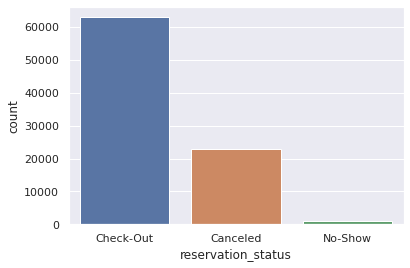

In [114]:
sns.countplot(x = 'reservation_status', data = df )

In [115]:
# we can check which segment amouonts for most cancelations

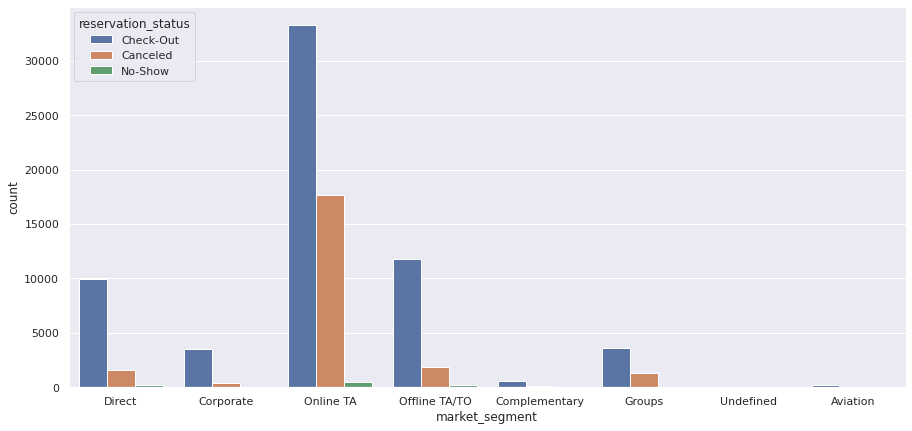

In [116]:
fig= plt.figure(figsize=(15,7))
sns.countplot(x = 'market_segment', data = df, hue = 'reservation_status')

In [117]:
  df.groupby('market_segment')['reservation_status'].value_counts()

market_segment  reservation_status
Aviation        Check-Out               182
                Canceled                 34
                No-Show                  11
Complementary   Check-Out               612
                Canceled                 75
                No-Show                  11
Corporate       Check-Out              3534
                Canceled                431
                No-Show                  66
Direct          Check-Out              9924
                Canceled               1545
                No-Show                 179
Groups          Check-Out              3602
                Canceled               1299
                No-Show                  36
Offline TA/TO   Check-Out             11800
                Canceled               1882
                No-Show                 175
Online TA       Check-Out             33299
                Canceled              17713
                No-Show                 532
Undefined       Canceled                 

In [118]:
df.groupby(['hotel','market_segment']).size()

hotel         market_segment
City Hotel    Aviation            227
              Complementary       511
              Corporate          2226
              Direct             5558
              Groups             2634
              Offline TA/TO      7270
              Online TA         34994
              Undefined             2
Resort Hotel  Complementary       187
              Corporate          1805
              Direct             6090
              Groups             2303
              Offline TA/TO      6587
              Online TA         16550
dtype: int64

In [119]:
df.groupby(['hotel','market_segment']).size().unstack()

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
hotel,,,,,,,,
City Hotel,227.0,511.0,2226.0,5558.0,2634.0,7270.0,34994.0,2.0
Resort Hotel,NaN,187.0,1805.0,6090.0,2303.0,6587.0,16550.0,NaN


In [120]:
df.groupby('hotel')['market_segment'].value_counts().unstack()

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
hotel,,,,,,,,
City Hotel,227.0,511.0,2226.0,5558.0,2634.0,7270.0,34994.0,2.0
Resort Hotel,NaN,187.0,1805.0,6090.0,2303.0,6587.0,16550.0,NaN


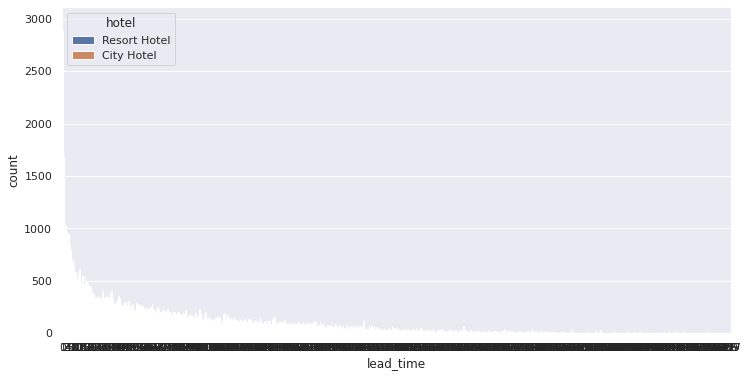

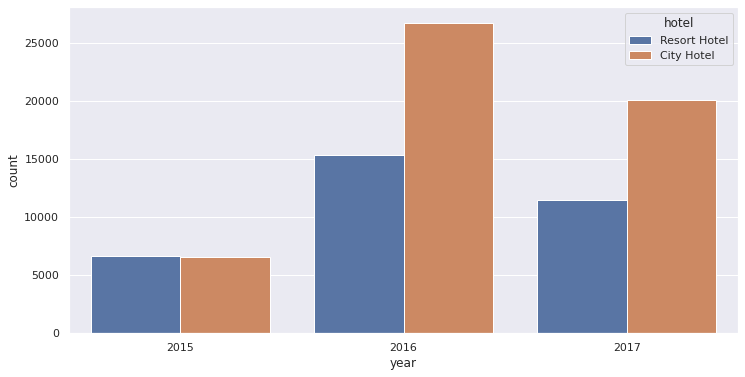

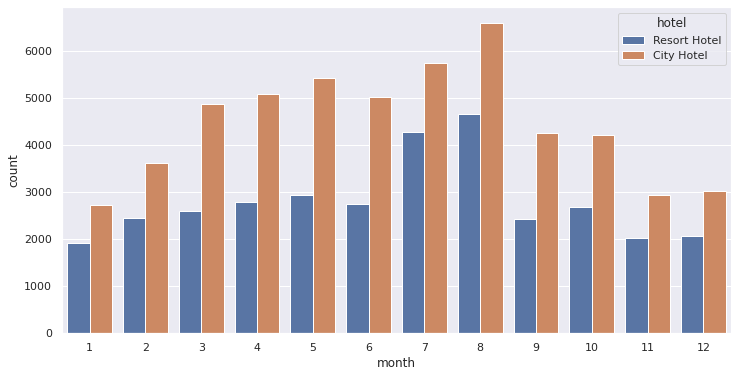

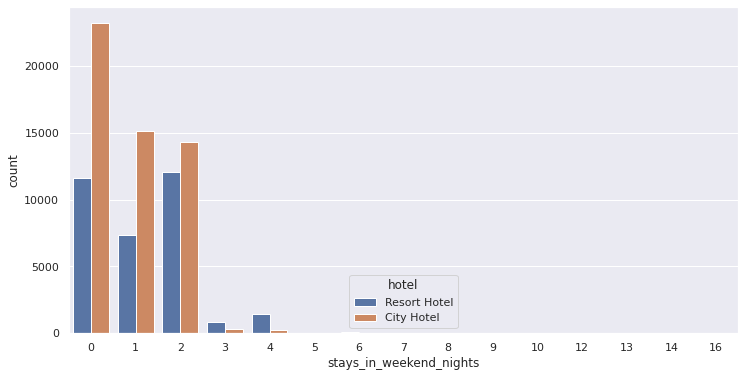

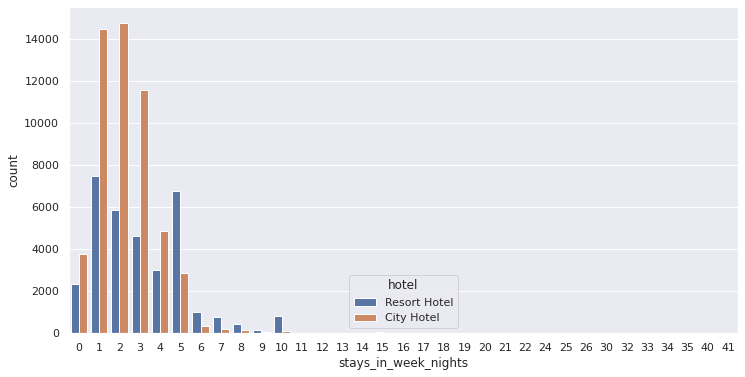

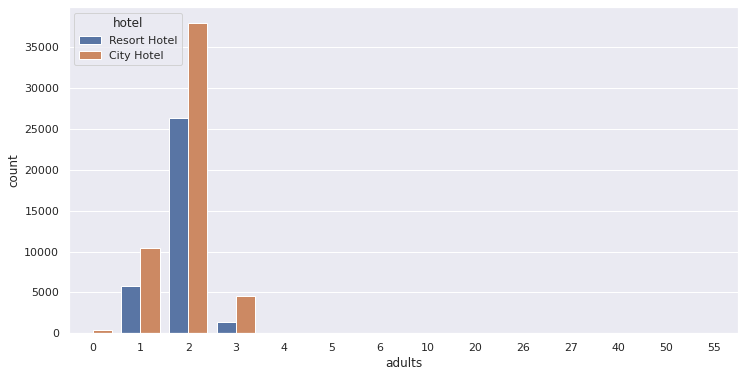

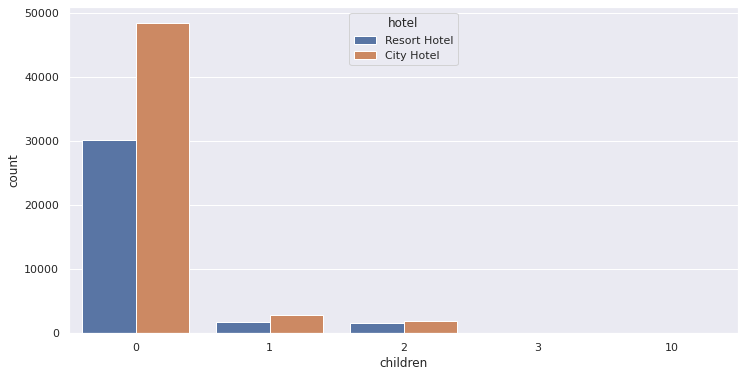

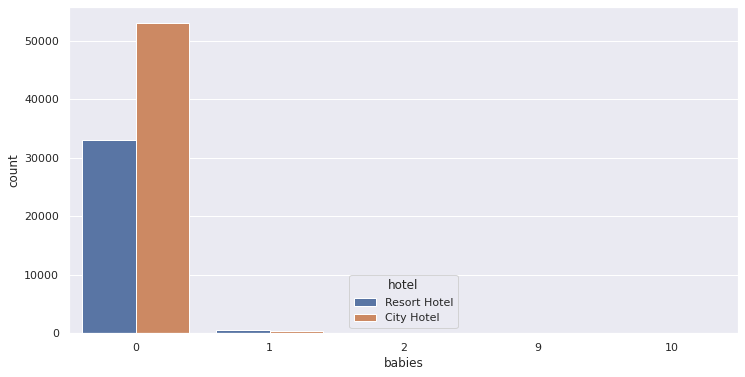

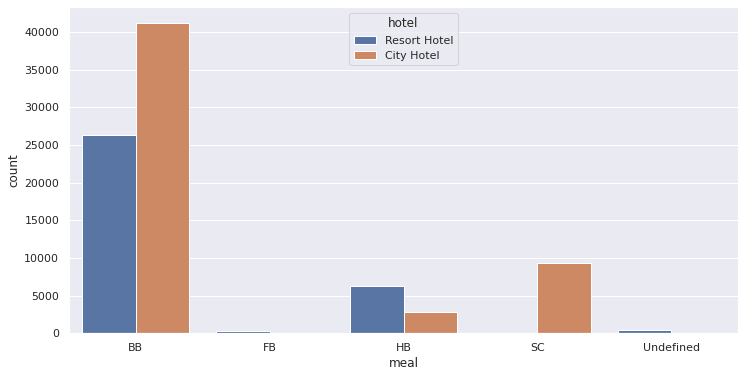

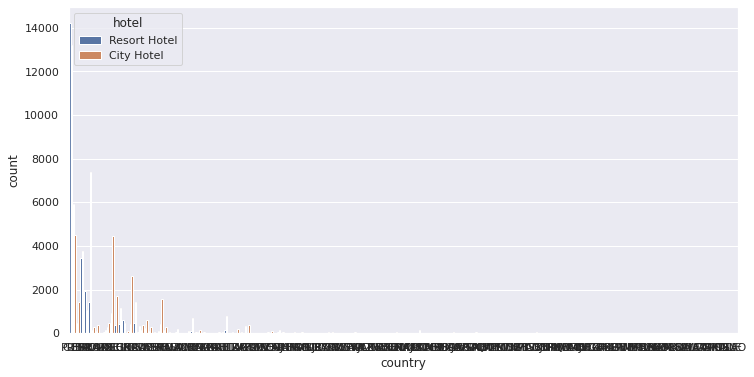

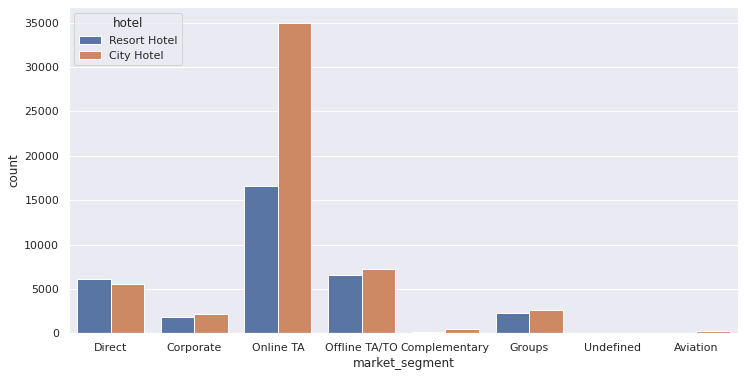

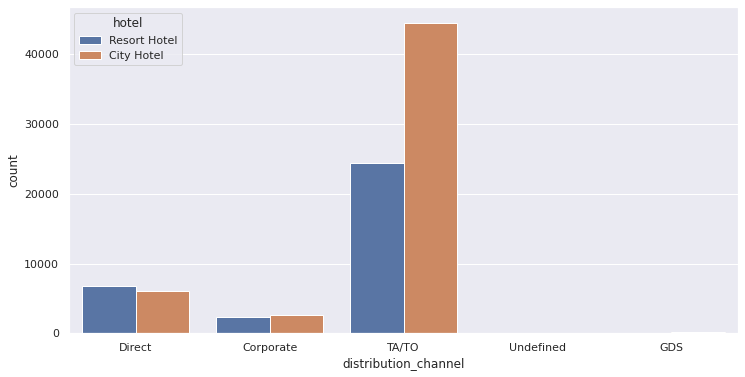

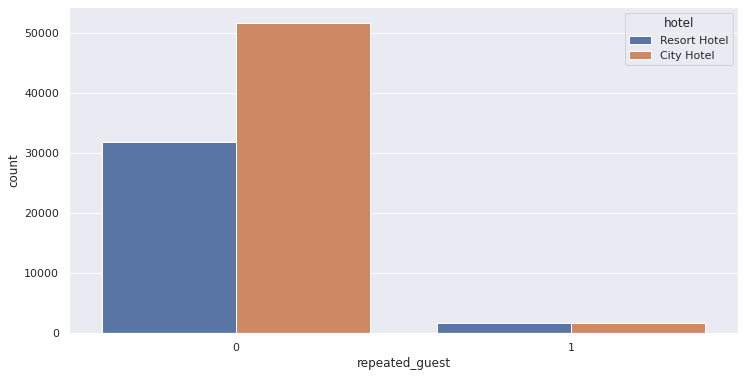

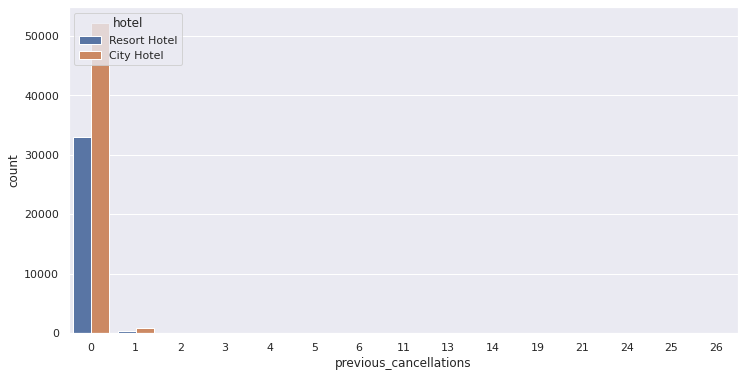

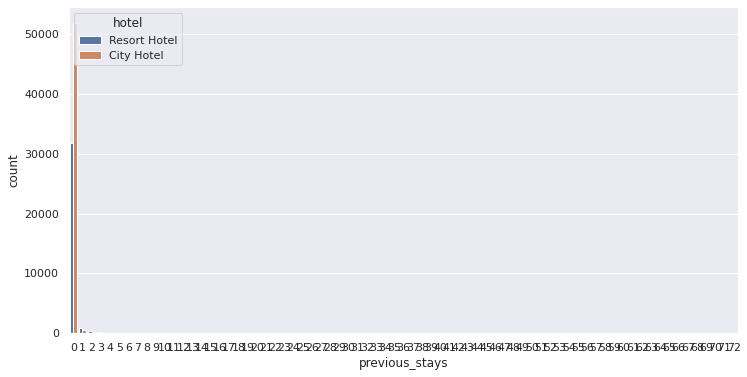

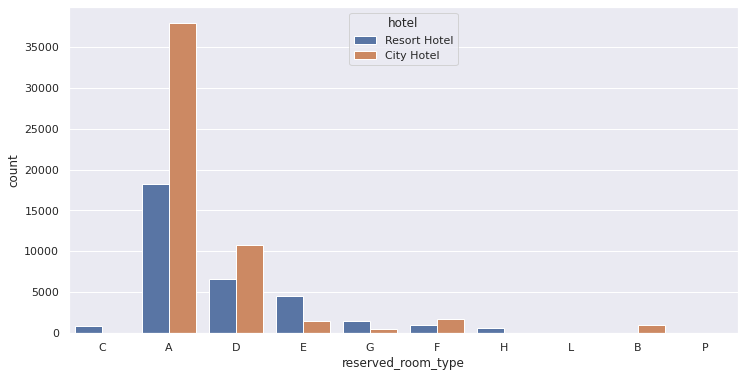

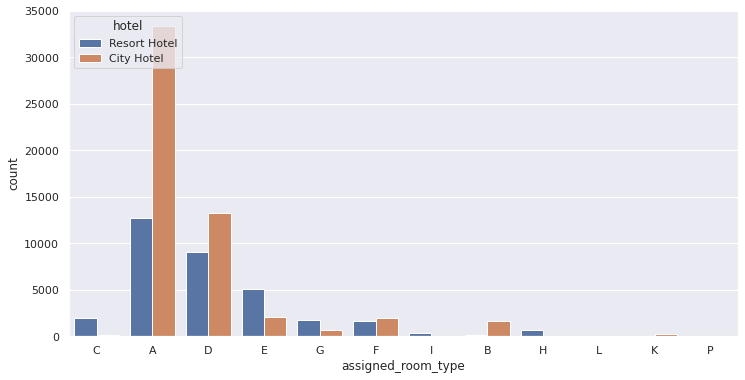

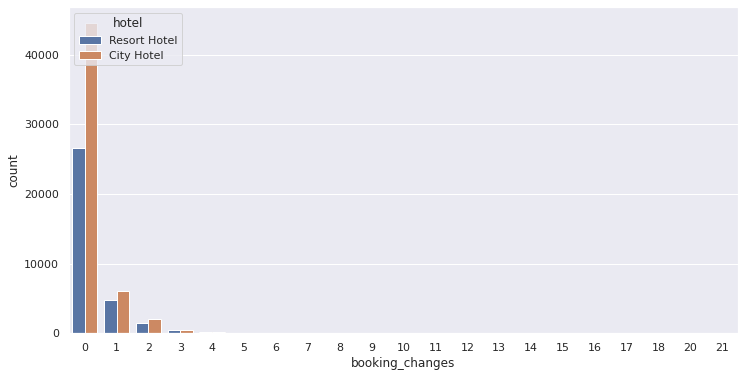

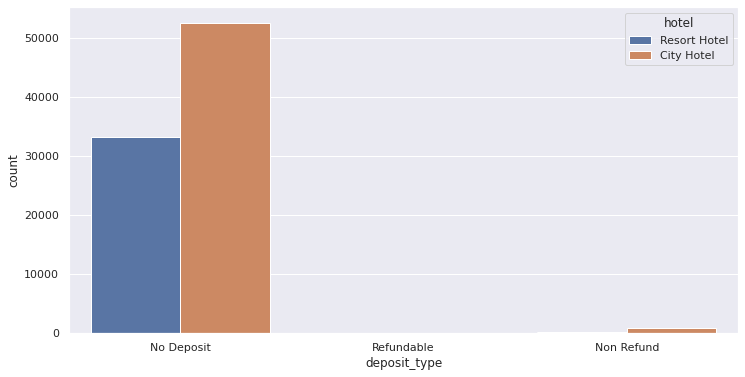

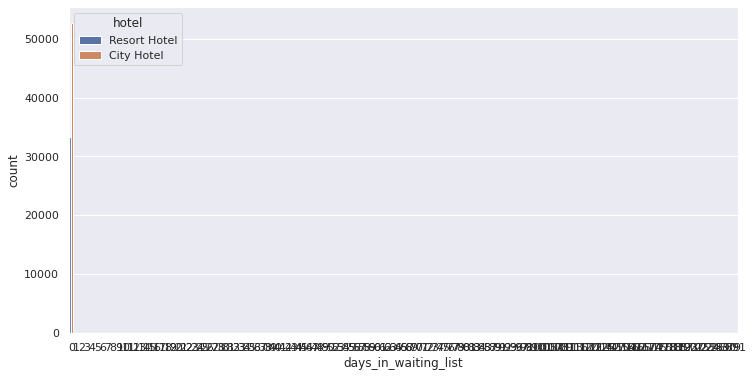

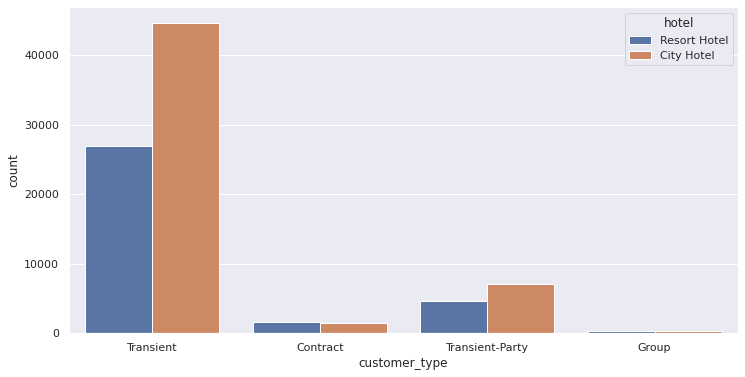

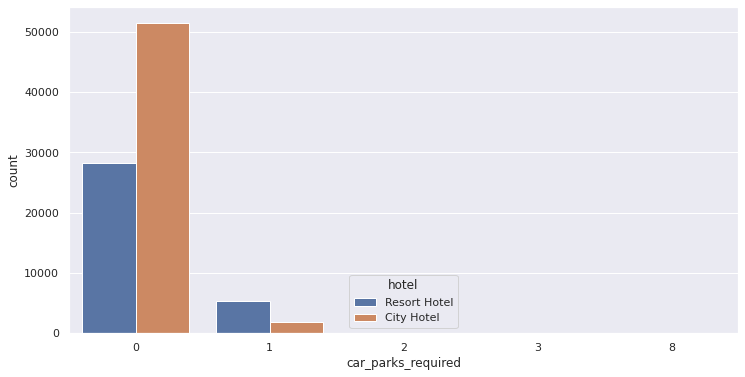

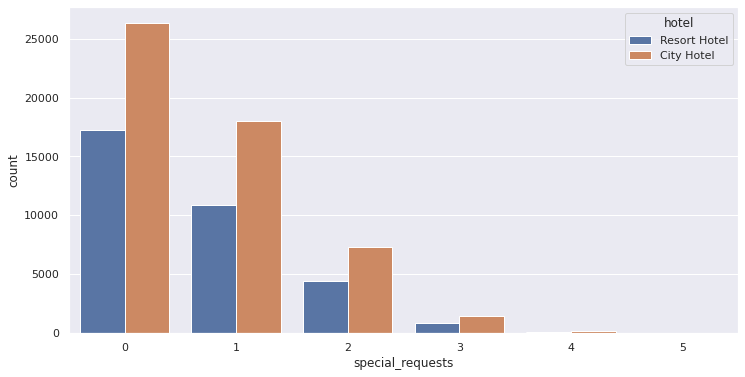

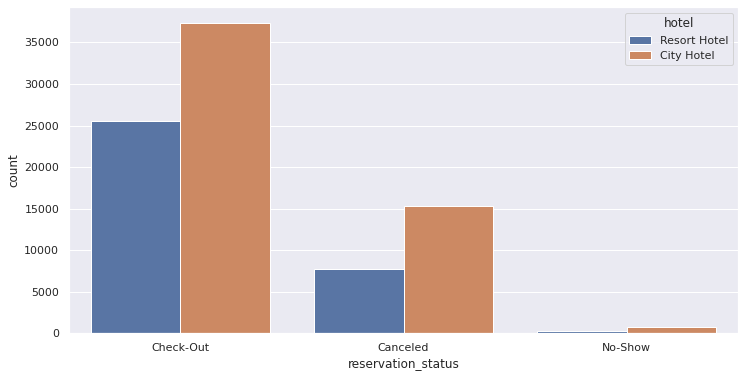

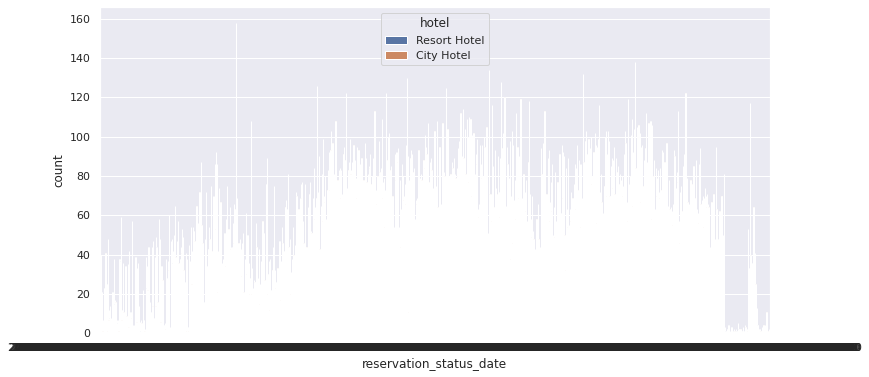

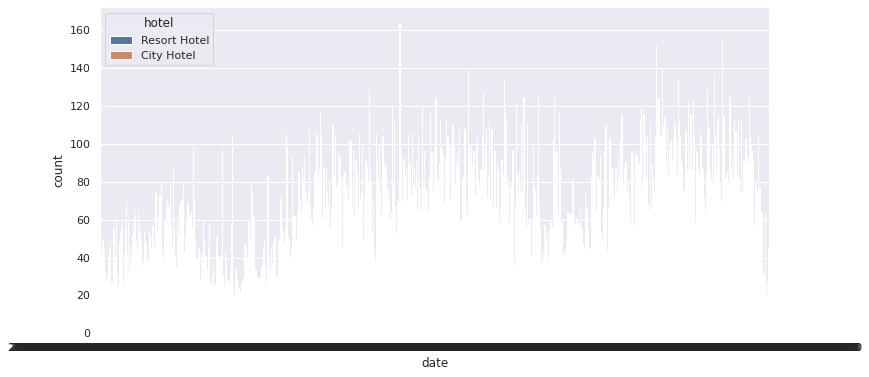

In [121]:
for column in df.columns[1:]:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  sns.countplot(df[column], x= column, hue=df['hotel'], ax= ax)
  plt.show()

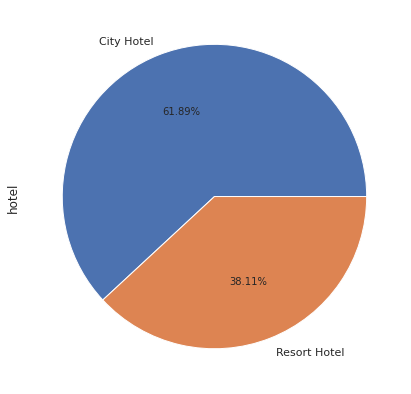

In [132]:
# Lets check the proportion of people with and witout children choosing the hotel type

fig= plt.figure(figsize=(15,7))
no_kids_df['hotel'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

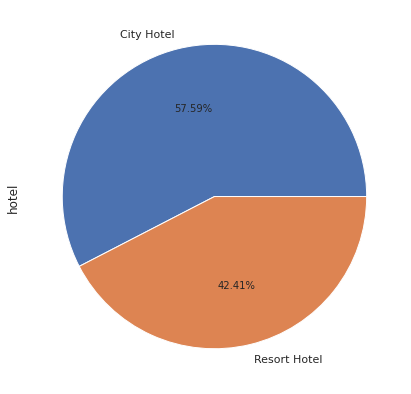

In [133]:

fig= plt.figure(figsize=(15,7))
with_kids_df['hotel'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

In [134]:
# We can see above that the proportion of people choosing city over resort drops when they have kids.
# However the drop is very slight and may not point towards any general rule of people with kids preferring resorts

Text(0, 0.5, 'year')

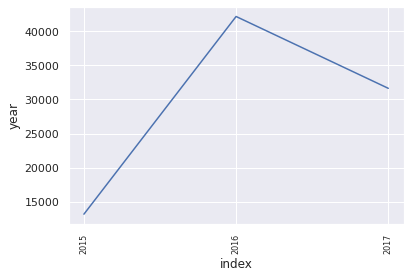

In [137]:
sns.lineplot(data = stays_by_year, x = 'index', y = 'year')
plt.xticks(stays_by_year['index'], rotation = 'vertical', size = 8)
plt.xlabel("index")
plt.ylabel("year")